In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Encontrar el valor atípico y explicar por qué se considera un valor extraño.

In [4]:
df=pd.read_csv("data.csv")
df.head()

,Proceso,Time [s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2


Si graficamos las datos podemos observar un punto muy alejado de los demas

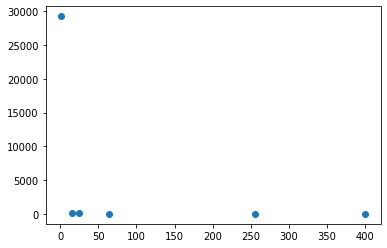

In [5]:
plt.scatter(df["Proceso"], df["Time [s]"])

2.Crear un archivo de esos datos en el formato CSV y leerlo en un Dataframe de Pandas.

In [6]:
df.head()

,Proceso,Time [s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2


3.Completar las columnas de Speeup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con p' = 16. Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [0]:
def aceleracion(t1,tp):
    return t1/tp
def eficiencia (Sp,P):
    return Sp/P
def costo (P,tp):
    return P*tp
def aceleracionRelativa(tp_prima, tp):
    return tp_prima/tp
def eficienciaRelativa (p_prima, Sp_prima, P):
    return p_prima*(Sp_prima/P)
def maxAceleracionRelativa (tp_prima, tp):
    return tp/tp_prima

In [45]:
#Datos
t1=df["Time [s]"][0]
p_prima=16
tp_prima=df["Time [s]"][1]

##Creacion de columnas
#Valores Absolutos
df["Sp"]= aceleracion(t1,df["Time [s]"])
df["Eff"]=eficiencia(df["Sp"], df["Proceso"])
df["Cp"]=costo(df["Proceso"], df["Time [s]"])

#Valores Relativos
df["Sp_r"]= aceleracionRelativa(tp_prima,df["Time [s]"])
df["Eff_r"]=eficienciaRelativa(p_prima,df["Sp_r"], df["Proceso"])
df["Sp' MAX"]=maxAceleracionRelativa(tp_prima,df["Time [s]"])
df.head()

,Proceso,Time [s],Sp,Eff,Cp,Sp_r,Eff_r,Sp' MAX
0,1,29278,1.000000,1.000000,29278,0.006080,0.097274,164.483146
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,1.000000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,0.438202
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,0.089888
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,0.011236


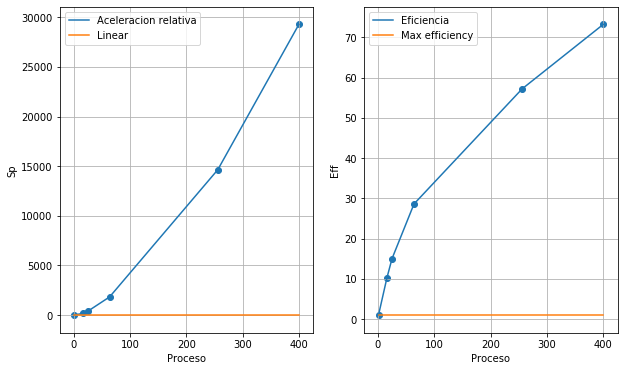

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axes[0].plot(df["Proceso"],df["Sp"],label="Aceleracion relativa")
axes[0].plot(df["Proceso"],aceleracion(df["Proceso"],df["Proceso"]),label="Linear")
axes[0].scatter(df["Proceso"],df["Sp"])
axes[0].set(xlabel="Proceso", ylabel="Sp")
axes[0].legend()
axes[0].grid()

axes[1].plot(df["Proceso"],df["Eff"],label="Eficiencia")
axes[1].plot(df["Proceso"],eficiencia(df["Sp"],df["Sp"]),label="Max efficiency")
axes[1].scatter(df["Proceso"],df["Eff"])
axes[1].set(xlabel="Proceso", ylabel="Eff")
axes[1].legend()
axes[1].grid()

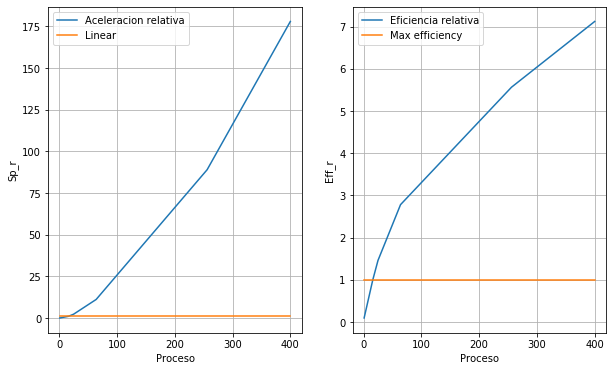

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axes[0].plot(df["Proceso"],df["Sp_r"],label="Aceleracion relativa")
axes[0].plot(df["Proceso"],aceleracion(df["Proceso"],df["Proceso"]),label="Linear")
axes[0].set(xlabel="Proceso", ylabel="Sp_r")
axes[0].legend()
axes[0].grid()

axes[1].plot(df["Proceso"],df["Eff_r"],label="Eficiencia relativa")
axes[1].plot(df["Proceso"],eficiencia(df["Sp"],df["Sp"]),label="Max efficiency")
axes[1].set(xlabel="Proceso", ylabel="Eff_r")
axes[1].legend()
axes[1].grid()

4.Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la transparencia 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [11]:
#Sin valores atipicos
df2=df.copy()
df2["Time [s]"][0]=430
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Proceso,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
0,1,430,1.000000,1.000000,29278,0.006080,0.097274
1,16,178,164.483146,10.280197,2848,1.000000,1.000000
2,25,78,375.358974,15.014359,1950,2.282051,1.460513
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250
4,256,2,14639.000000,57.183594,512,89.000000,5.562500


In [12]:
#Datos
t1=df2["Time [s]"][0]
p_prima=16
tp_prima=df2["Time [s]"][1]

#Creacion de columnas
#Valores Absolutos
df2["Sp"]= aceleracion(t1,df2["Time [s]"])
df2["Eff"]=eficiencia(df2["Sp"], df2["Proceso"])
df2["Cp"]=costo(df2["Proceso"], df2["Time [s]"])

df2.to_csv("datos_sin_atipicos.csv")
df2.head()

,Proceso,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
0,1,430,1.000000,1.000000,430,0.006080,0.097274
1,16,178,2.415730,0.150983,2848,1.000000,1.000000
2,25,78,5.512821,0.220513,1950,2.282051,1.460513
3,64,16,26.875000,0.419922,1024,11.125000,2.781250
4,256,2,215.000000,0.839844,512,89.000000,5.562500


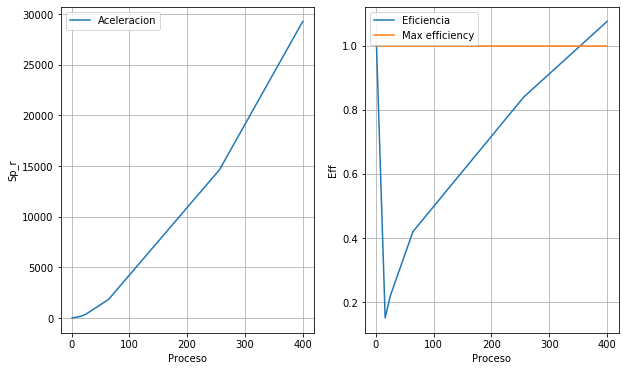

In [67]:
#Sin atipicos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axes[0].plot(df2["Proceso"],df["Sp"],label="Aceleracion")
axes[0].set(xlabel="Proceso", ylabel="Sp_r")
axes[0].legend()
axes[0].grid()

axes[1].plot(df2["Proceso"],df2["Eff"],label="Eficiencia")
axes[1].plot(df2["Proceso"],eficiencia(df2["Sp"],df2["Sp"]),label="Max efficiency")
axes[1].set(xlabel="Proceso", ylabel="Eff")
axes[1].legend()
axes[1].grid()

5.Contar la historia del análisis de esta información usando gráficos que resalten lo realizado en los incisos 2 y 3.

Si observamos los estadisticos descriptivos de los datos podemos observar que tenemos una desviacion estandar bastante grande debido al valor atipico de 29278seg.
Haciendo uso del digrama de cajas es mas facil distinguir ese valor atipico.

,Proceso,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,127.000000,4925.500000,7714.619520,30.877491,6002.000000,46.902188,3.003590
std,163.548158,11930.431773,11982.703130,28.483535,11440.643199,72.850644,2.770719
min,1.000000,1.000000,1.000000,1.000000,400.000000,0.006080,0.097274
25%,18.250000,5.500000,217.202103,11.463737,640.000000,1.320513,1.115128
50%,44.500000,47.000000,1102.616987,21.803078,1487.000000,6.703526,2.120881
75%,208.000000,153.000000,11436.718750,50.035645,2623.500000,69.531250,4.867188
max,400.000000,29278.000000,29278.000000,73.195000,29278.000000,178.000000,7.120000


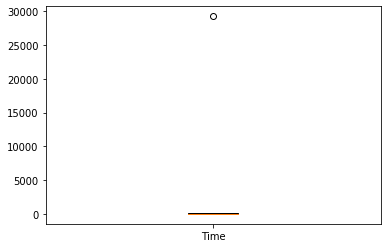

In [14]:
plt.boxplot(df["Time [s]"],patch_artist=True,labels=["Time"])
df.describe()

Si cambiamos ese valor atipico por 430 y realizamos el procedimiento anterior podemos ver que la dispercion de los datos disminuye.

,Proceso,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,127.000000,117.500000,113.467258,0.617710,1194.000000,46.902188,3.003590
std,163.548158,167.386678,175.861070,0.404802,1001.539615,72.850644,2.770719
min,1.000000,1.000000,1.000000,0.150983,400.000000,0.006080,0.097274
25%,18.250000,5.500000,3.190003,0.270365,450.500000,1.320513,1.115128
50%,44.500000,47.000000,16.193910,0.629883,768.000000,6.703526,2.120881
75%,208.000000,153.000000,167.968750,0.959961,1718.500000,69.531250,4.867188
max,400.000000,430.000000,430.000000,1.075000,2848.000000,178.000000,7.120000


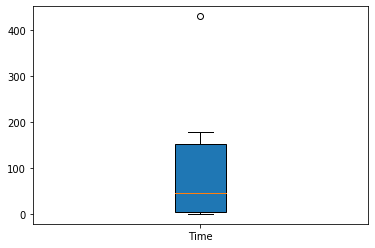

In [15]:
plt.boxplot(df2["Time [s]"],patch_artist=True,labels=["Time"])
df2.describe()